In [80]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [81]:
class MathState(TypedDict):
    a: int
    b: int
    op: Literal['add','subtract','multiply','divide']
    result: float

In [82]:
graph= StateGraph(MathState)

In [83]:
def show_number(state: MathState):
    return{'message': f"The numbers are {state['a']} and {state['b']}"}

In [84]:
def add(state: MathState):
    result = state['a'] + state['b']
    print(f"The addition for this number is : {result}")
    return {'result': result}

In [85]:
def subtract(state: MathState):
    result = state['a'] - state['b']
    print(f"The subtraction for this number is : {result}")
    return {'result': result}

In [86]:
def multiply(state: MathState):
    result = state['a'] * state['b']
    print(f"The multiplication for this number is : {result}")
    return {'result': result}

In [87]:
def divide(state: MathState):
    a = state['a']
    b = state['b']
    if b == 0:
        return {'result': 'Zero cannot be divided'}
    else:
        result = a / b
    print(f"The division for this number is : {result}")
    return {'result': result}

In [88]:
def get_operation(state: MathState ):
    op=state['op']
    return {'op': op}
    

In [89]:
def check_condition(state: MathState) -> Literal["add", "subtract", "multiply", "divide"]:
    op = state['op']
    if op == 'add':
        return 'add'
    elif op == 'subtract':
        return 'subtract'
    elif op == 'multiply':
        return 'multiply'
    elif op == 'divide':
        return 'divide'
    else:
        raise ValueError(f"Unknown operation: {op}")

In [90]:
#def show_result(state: MathState):
    #return {'message': f"The result is {state['result']}"}

In [91]:
graph.add_node("show_number", show_number)
graph.add_node("get_operation", get_operation)
graph.add_node("add", add)
graph.add_node("subtract", subtract)
graph.add_node("multiply", multiply)
graph.add_node("divide", divide)
graph.add_node("show_result", show_result)

In [92]:
graph.add_edge(START, "show_number")
graph.add_edge("show_number", "get_operation")
graph.add_conditional_edges(
    "get_operation",
    check_condition,
    {
        "add": "add",
        "subtract": "subtract",
        "multiply": "multiply",
        "divide": "divide"
    }
)
graph.add_edge("add", "show_result")
graph.add_edge("subtract", "show_result")
graph.add_edge("multiply", "show_result")
graph.add_edge("divide", "show_result")
graph.add_edge("show_result", END)

In [93]:
compiled_graph = graph.compile()

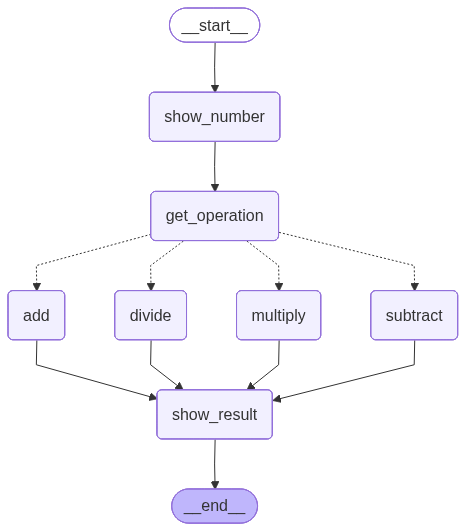

In [94]:
compiled_graph

In [95]:
input_state = {
    "a": 4,
    "b": 0,
    "op": "divide"
}
result = compiled_graph.invoke(input_state)
print("Final Result:", result)

Final Result: {'a': 4, 'b': 0, 'op': 'divide', 'result': 'Zero cannot be divided'}
